In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(1)

%matplotlib inline
np.random.seed(1)
print('ok')

ok


In [61]:
N = 10000
D = 10
X = 10*np.random.randn(N,D)
w_true = np.random.randn(D,1)
y = X.dot(w_true)
y_obs = y + np.random.randn(N,1)*5
print('ok')

ok


In [77]:
def dL_dw(X,e):
    return -e*X.T/len(e)

def loss_function(e):
    L = e.T.dot(e)/N/2
    return L
print('ok')

ok


In [78]:

def Nadam(X,y_obs,alpha=0.01, mu = 0.9, nu=0.999,epsilon=1e-8, epochs=100):
    #Initialisation des paramétres 
    N = len(X)
    D = len(X[0])
    # les conditions initiales
    w = np.random.randn(D,1)
    params = []
    #loss = np.zeros((N,1))
    Loss = np.zeros((epochs,1))
    m = np.zeros((D,1))
    n = np.zeros((D,1))
    muI = mu
    nuI = 1
    for j in range(epochs):
        for i in range(int(N/epochs)):
            idx = np.random.choice(N,1,replace=False)
            e = y_obs[idx] - X[idx].dot(w)
            sg = dL_dw(X[idx],e)
            m = mu*m + (1-mu)*sg
            n = nu*n + (1-nu)*sg*sg
            muI = muI*mu
            mHat = (mu*m/(1-muI)) + ((1-mu)*sg/(1-muI))
            nuI = nuI * nu
            nHat = nu*n/(1-nuI)
            w = w - alpha*mHat/(np.sqrt(nHat+epsilon))
            #loss[i] = (e - (y_obs[idx] - X[idx].dot(w)))**2
        params.append(w)
        e_global = y_obs - X.dot(w)
        L = loss_function(e_global)
        Loss[j]=L
    return params,Loss


In [79]:

def Adamax(X,y_obs,alpha=0.01, beta1 = 0.9, beta2=0.999,epochs = 100):
    #Initialisation des paramétres 
    N = len(X)
    D = len(X[0])
    # les conditions initiales
    w = np.random.randn(D,1)
    params = []
    loss = np.zeros((N,1))
    Loss = np.zeros((epochs,1))
    m = np.zeros((D,1))
    u = np.zeros((D,1))
    betai = 1
    for j in range(epochs):
        for i in range(int(N/epochs)):
            idx = np.random.choice(N,1,replace=False)
            e = y_obs[idx] - X[idx].dot(w)
            sg = dL_dw(X[idx],e)
            m = beta1*m + (1-beta1)*sg
            u = np.maximum(beta2*u, abs(sg))
            betai = betai*beta1
            mHat = (m/(1-betai))
            w = w - alpha*mHat/u
            #loss[i] = (e - (y_obs[idx] - X[idx].dot(w)))**2
        params.append(w)    
        e_global = y_obs - X.dot(w)
        L = loss_function(e_global)
        Loss[j] = L
    return params,Loss

In [97]:
def gradient_descent(gamma=0.00002, n_epochs=100, batch_size=100, decay=0.9):
    
    # get starting conditions
    w = np.random.randn(D,1)
    params = []
    Loss = np.zeros((n_epochs,1))
    for i in range(n_epochs):
        
        for j in range(int(N/n_epochs)):
            idx = np.random.choice(N,1,replace=False)
            e = y_obs[idx] - X[idx].dot(w) # Really important that you use y_obs and not y (you do not have access to true y)
            #update parameters
            w = w - gamma*dL_dw(X[idx],e)  
        params.append(w)
        gamma = gamma*decay #decay the learning parameter
        e_global = y_obs - X.dot(w)
        L = loss_function(e_global)
        Loss[i] = L
    return params, Loss
        
params_GS, Loss_GS = gradient_descent()

In [98]:
params_adamax, Loss_adamax = Adamax(X,y_obs)#Test avec Adamax sur X et y_obs

In [99]:
params_nadam, Loss_nadam = Nadam(X,y_obs)#Test avec Nadam sur X et y_obs

In [89]:
model = LinearRegression(fit_intercept=False)
model.fit(X,y_obs)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [90]:
np.hstack([params_adamax[-1],params_GS[-1],model.coef_.T,params_nadam[-1]])

array([[-2.25613108, -2.24167973, -2.24042919, -2.22355726],
       [ 0.5660429 ,  0.60337917,  0.60366282,  0.65241265],
       [ 1.20081684,  1.17099438,  1.18439142,  1.20312658],
       [ 0.36379672,  0.32736652,  0.32363161,  0.29860087],
       [ 0.11600013,  0.06113592,  0.0609007 , -0.03923627],
       [ 0.6740637 ,  0.65888715,  0.66697908,  0.69140994],
       [ 0.26635791,  0.2481525 ,  0.23450651,  0.19058202],
       [-0.14726094, -0.15522255, -0.16943645, -0.13667322],
       [ 0.40914312,  0.39988609,  0.39861843,  0.40178094],
       [ 0.95560556,  0.93930647,  0.94297948,  0.88491146]])

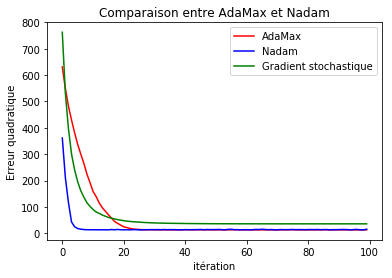

In [100]:
plt.plot(Loss_adamax, color='r', label='AdaMax')
plt.plot(Loss_nadam, color='b', label='Nadam')
plt.plot(Loss_GS, color='g', label='Gradient stochastique')
plt.legend(loc='upper right')
plt.xlabel('itération')
plt.ylabel('Erreur quadratique')
plt.title('Comparaison entre AdaMax et Nadam')

plt.show()

In [92]:
print(Loss_adamax[-1])
print(Loss_nadam[-1])
print(Loss_GS[-1])

[12.84912781]
[13.47355791]
[12.46124738]
